CS589 ASSIGNMENT 2\
\
Name: Dorian Benhamou Goldfajn\
Email: dbenhamougol@umass.edu\
Discussed With: Aryan Nair

Question 1

In [1]:
import pangolin as pg

/Users/dorian/Documents/rep589/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
niter =  365
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, 0.125), niter)
z = fun_z(50.0)

x = pg.slot()
with pg.Loop(niter) as i:
    x[i] = pg.normal(z[i], 1)

Question 2

In [3]:
# numpy allowed only for reading in data!
import numpy as np
data = np.load('polls1.npz')
observed_times = data['t']
x_obs = data['x_t']

niter = 365
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, 0.125), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)
x = pg.slot()

with pg.Loop(100) as i:
    actual_time = observed_times_rv[i]
    z_at_observed_time = z[actual_time]
    x[i] = pg.normal(z_at_observed_time, 1)
    
    
z_samples = pg.sample(z, x, x_obs, niter=10000)
z_samples


Array([[49.98073 , 49.98818 , 49.773415, ..., 49.02077 , 48.98049 ,
        48.926697],
       [50.303185, 50.029644, 49.98169 , ..., 48.977295, 48.933643,
        48.982212],
       [49.97263 , 49.570686, 49.364433, ..., 48.694138, 48.594894,
        48.539494],
       ...,
       [49.828903, 49.638317, 49.50575 , ..., 49.482674, 49.49848 ,
        49.675644],
       [50.187122, 50.32228 , 50.100117, ..., 48.97162 , 49.11151 ,
        49.386494],
       [49.932186, 49.70999 , 49.725098, ..., 49.31996 , 49.40124 ,
        49.36117 ]], dtype=float32)

Question 3

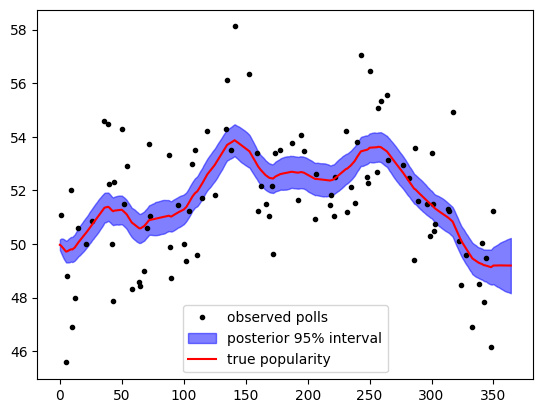

In [4]:
from matplotlib import pyplot as plt
plt.plot(observed_times,x_obs,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 4

In [5]:
data = np.load('polls1.npz')
observed_times = data['t']
x_obs = data['x_t']

niter =  365
sig_trans = pg.exponential(1)
sig_obs = pg.exponential(1)

fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)
x = pg.slot()
with pg.Loop(100) as i:
    actual_time = observed_times_rv[i]
    z_at_observed_time = z[actual_time]
    x[i] = pg.normal(z_at_observed_time, sig_obs)

z_samples, sig_trans_samples, sig_obs_samples = pg.sample([z, sig_trans, sig_obs], x, x_obs, niter=10000)
z_samples, sig_trans_samples, sig_obs_samples

NONE
NONE
NONE
NONE
NONE
NONE
NONE


(Array([[49.63874 , 49.534267, 49.794434, ..., 50.566376, 50.57574 ,
         50.939037],
        [50.082706, 50.29028 , 50.15626 , ..., 48.097515, 47.751076,
         48.2277  ],
        [50.01512 , 49.886402, 49.62324 , ..., 48.593952, 48.700867,
         49.1136  ],
        ...,
        [49.58618 , 49.44326 , 49.076736, ..., 51.20393 , 51.678734,
         50.854168],
        [49.401802, 49.554817, 49.613796, ..., 49.109066, 48.850025,
         48.846134],
        [50.01719 , 49.365536, 48.684593, ..., 48.766926, 48.54419 ,
         49.152096]], dtype=float32),
 Array([0.30639935, 0.30612516, 0.28271133, ..., 0.39758205, 0.3518446 ,
        0.38661617], dtype=float32),
 Array([1.6485883, 1.7968007, 1.7210921, ..., 1.8088584, 1.4230168,
        2.2064097], dtype=float32))

Question 5

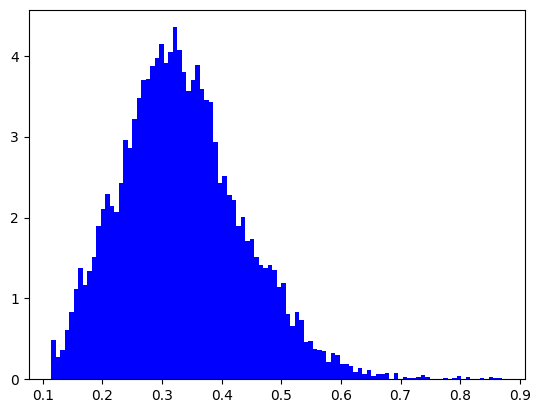

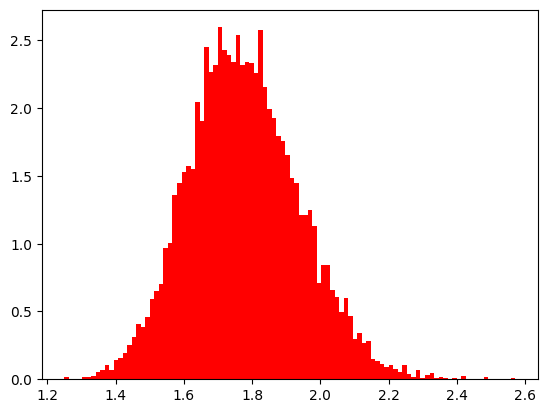

In [6]:
plt.hist(sig_trans_samples, bins=100, density=True, color='blue')
plt.show()
plt.hist(sig_obs_samples, bins=100, density=True, color='red')
plt.show()

Question 6

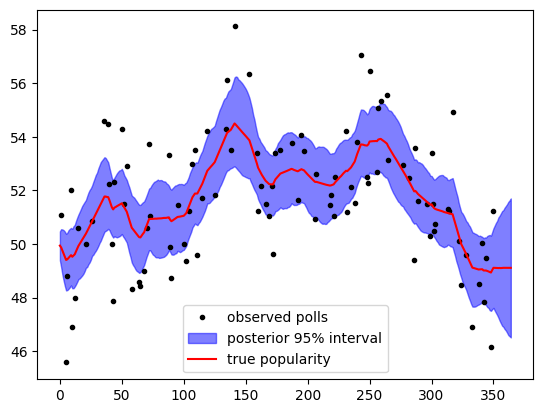

In [7]:
plt.plot(observed_times,x_obs,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 7


In [8]:
niter =  365
sig_trans = pg.exponential(1)
sig_obs = pg.slot()
with pg.Loop(3) as i:
    sig_obs[i] = pg.exponential(1)
    
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

x = pg.slot()
with pg.Loop(niter) as t:
    with pg.Loop(3) as i:
        x[t,i] = pg.normal(z[t], sig_obs[i])



NONE


Question 8

In [9]:
data = np.load('polls2.npz')
observed_times = data['t']
x_obs = data['x_t']

niter = 365
sig_trans = pg.exponential(1)


fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)
sig_obs = pg.slot()
x = pg.slot()
with pg.Loop(3) as i:
    sig_obs[i] = pg.exponential(1)
    with pg.Loop(20) as t:
        actual_time = observed_times_rv[i,t]
        z_at_observed_time = z[actual_time]
        x[i, t] = pg.normal(z_at_observed_time, sig_obs[i])


z_samples, sig_trans_samples, sig_obs_samples = pg.sample([z, sig_trans, sig_obs], x, x_obs,niter=10000)
z_samples, sig_trans_samples, sig_obs_samples


NONE
NONE
NONE
NONE
NONE
NONE
NONE


(Array([[50.43957 , 50.373325, 50.18493 , ..., 59.871803, 60.02015 ,
         60.24031 ],
        [49.87739 , 50.154644, 49.99985 , ..., 61.318752, 61.32224 ,
         61.22602 ],
        [50.162937, 50.42548 , 51.004593, ..., 62.031353, 62.317924,
         62.34025 ],
        ...,
        [49.905647, 50.019814, 49.996525, ..., 60.232994, 60.508404,
         60.017624],
        [50.278397, 50.311024, 50.691074, ..., 60.752296, 60.624043,
         60.90171 ],
        [49.88388 , 49.440628, 49.40558 , ..., 60.489666, 60.10468 ,
         60.129414]], dtype=float32),
 Array([0.30245188, 0.26193225, 0.26795793, ..., 0.28622884, 0.25983733,
        0.25485942], dtype=float32),
 Array([[4.528112  , 0.8565489 , 0.03938048],
        [5.2482166 , 1.3605964 , 0.04852331],
        [3.930486  , 0.9684833 , 0.07535471],
        ...,
        [5.6824937 , 0.88567287, 0.29334402],
        [4.040484  , 0.7281879 , 0.2837943 ],
        [5.0932255 , 0.9296812 , 0.4851516 ]], dtype=float32))

Question 9


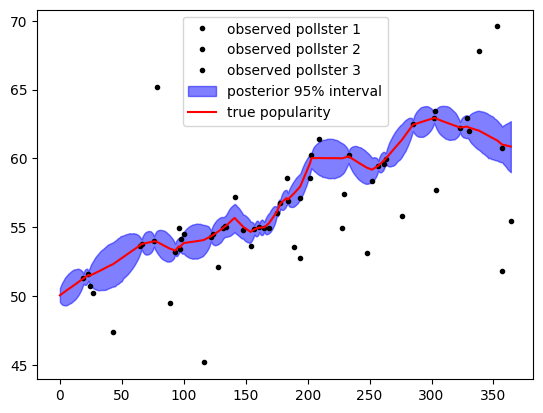

In [10]:
plt.plot(observed_times[0],x_obs[0],'k.',label='observed pollster 1')
plt.plot(observed_times[1],x_obs[1],'k.',label='observed pollster 2')
plt.plot(observed_times[2],x_obs[2],'k.',label='observed pollster 3')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 10

/var/folders/y0/q33hr0051455hhzyzs_b6w_40000gn/T/ipykernel_2942/3695874901.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


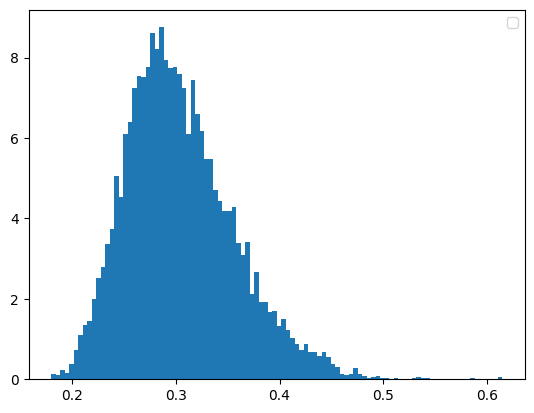

In [11]:

plt.hist(sig_trans_samples,bins=100,density=True)
plt.legend()
plt.show()


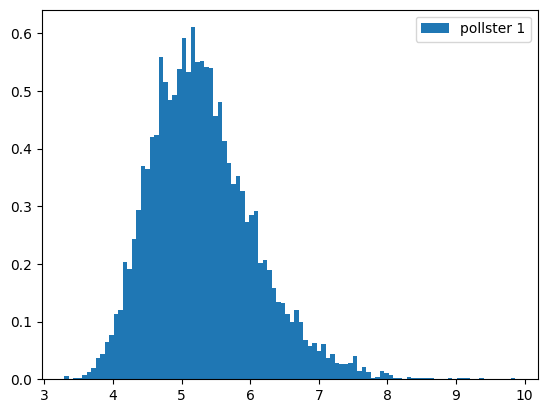

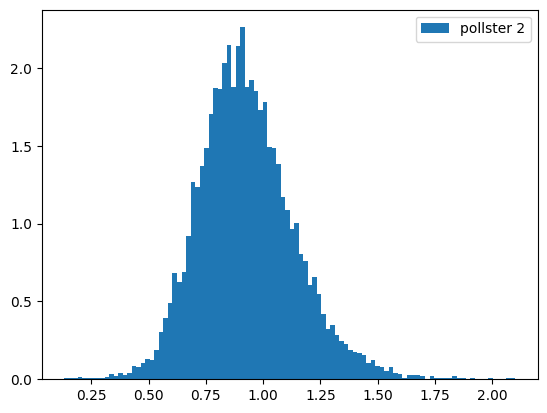

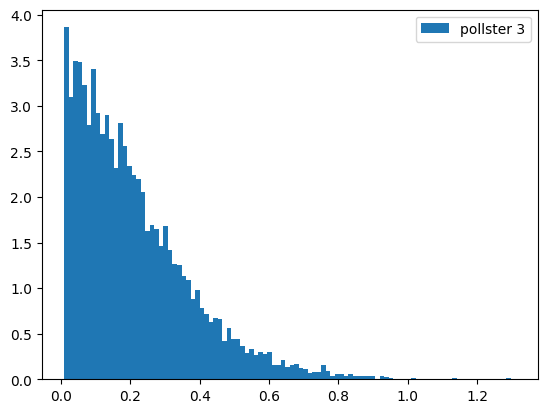

In [12]:

plt.hist(sig_obs_samples[:,0],bins=100,density=True,label='pollster 1')
plt.legend()
plt.show()
plt.hist(sig_obs_samples[:,1],bins=100,density=True,label='pollster 2')
plt.legend()
plt.show()
plt.hist(sig_obs_samples[:,2],bins=100,density=True,label='pollster 3')
plt.legend()
plt.show()
